Import all the relevant packages.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from my_func import *
from torchsummary import summary

Define the architecture of the two neural networks we are going to compare.

In [2]:

class NN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(input_size, 400)
        self.fc2 = nn.Linear(400, 200)
        self.fc3 = nn.Linear(200, num_classes)

    def forward(self, x):
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x       

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        #self.conv1 = nn.Conv2d(in_channels=3, out_channels=15, kernel_size=11, padding=5)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=3, out_channels=15, kernel_size=7, padding=3)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(3840, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        #x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        #x = self.dropout1(x)
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        #x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x 

Set device to cuda if it exists, otherwise run on cpu.

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device.type

'cuda'

Define input size(only used for linnear model), number of classes in the dataset, learning rate, batch size, number of epochs and the classes in the given dataset(for testing accuracy later).

In [4]:
input_size = 32*32*3
num_classes = 10
learning_rate = 0.001
batch_size = 64
num_epochs = 50
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Load/download the desired dataset. Split them into train and test sets.

In [5]:
train_dataset = datasets.CIFAR10(root = 'dataset/', train = True, transform = transforms.ToTensor(), download = True)
train_loader = DataLoader(dataset = train_dataset, batch_size = batch_size, shuffle = True)
test_dataset = datasets.CIFAR10(root = 'dataset/', train = False, transform = transforms.ToTensor(), download = True)
test_loader = DataLoader(dataset = test_dataset, batch_size = batch_size, shuffle = True)

Files already downloaded and verified
Files already downloaded and verified


Create the models and define lossfunction and optimizer.

In [6]:
linear_model = NN(input_size = input_size, num_classes = num_classes).to(device = device)
convolutional_model = CNN().to(device = device)

criterion = nn.CrossEntropyLoss()

linear_optimizer = optim.Adam(linear_model.parameters(), lr = learning_rate)
convolutional_optimizer = optim.Adam(convolutional_model.parameters(), lr = learning_rate)

Train both models using their forward function and my own train function(see my_func.py).

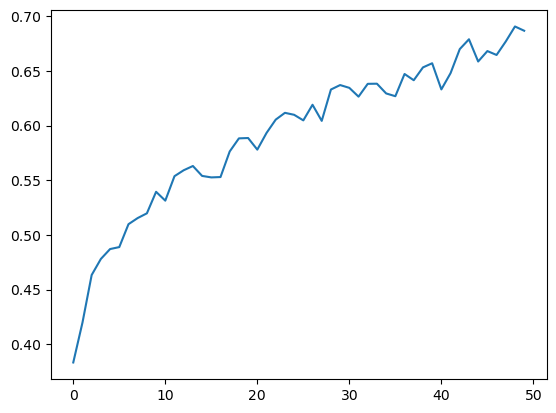

In [7]:
my_train(linear_model, num_epochs, train_loader, criterion, linear_optimizer, device) #Train Linear model

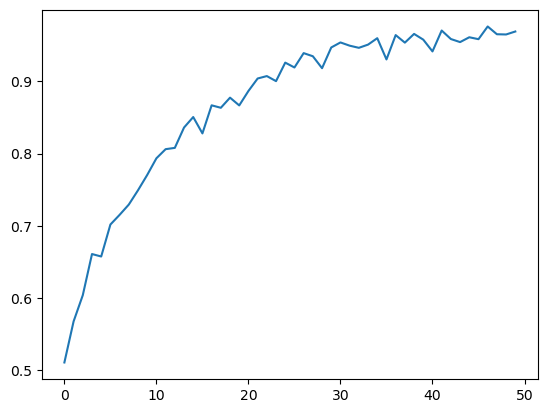

In [8]:
my_train(convolutional_model, num_epochs, train_loader, criterion, convolutional_optimizer, device) #Train convolutional model

Check overall accuracy on train and test sets with both models.

In [9]:
print("Linear model(CIFAR10): ")
check_accuracy(train_loader, linear_model, device)
check_accuracy(test_loader, linear_model, device)
print("Convolutional model(CIFAR10): ")
check_accuracy(train_loader, convolutional_model, device)
check_accuracy(test_loader, convolutional_model, device)

Linear model(CIFAR10): 
Checking accuracy on the training data
Got 34334 / 50000 with accuracy 68.67%
Checking accuracy on test data
Got 5093 / 10000 with accuracy 50.93%
Convolutional model(CIFAR10): 
Checking accuracy on the training data
Got 48461 / 50000 with accuracy 96.92%
Checking accuracy on test data
Got 5962 / 10000 with accuracy 59.62%


Check the accuracy of the models based on specific classes in the datasets.

In [10]:
#print("Checking accuracy of convolutional model(CIFAR10): \n")
#check_accuracy_by_class(classes, test_loader, device, linear_model)
#print("Number of parameters in Linear NN(CIFAR10):", sum(p.numel() for p in linear_model.parameters() if p.requires_grad))


#print("Checking accuracy of convolutional model(STL10): \n")
check_accuracy_by_class(classes, test_loader, device, linear_model)
#print("Number of parameters in Linear NN:", sum(p.numel() for p in linear_model.parameters() if p.requires_grad))
summary(linear_model)

Accuracy for class: plane is 54.6 %
Accuracy for class: car   is 60.5 %
Accuracy for class: bird  is 45.6 %
Accuracy for class: cat   is 31.2 %
Accuracy for class: deer  is 47.7 %
Accuracy for class: dog   is 32.7 %
Accuracy for class: frog  is 62.0 %
Accuracy for class: horse is 47.1 %
Accuracy for class: ship  is 71.9 %
Accuracy for class: truck is 56.0 %
Layer (type:depth-idx)                   Param #
├─Linear: 1-1                            1,229,200
├─Linear: 1-2                            80,200
├─Linear: 1-3                            2,010
Total params: 1,311,410
Trainable params: 1,311,410
Non-trainable params: 0


Layer (type:depth-idx)                   Param #
├─Linear: 1-1                            1,229,200
├─Linear: 1-2                            80,200
├─Linear: 1-3                            2,010
Total params: 1,311,410
Trainable params: 1,311,410
Non-trainable params: 0

In [11]:
#print("Checking accuracy of convolutional model(CIFAR10): \n")
#check_accuracy_by_class(classes, test_loader, device, convolutional_model)
#print("Number of parameters in convolutional NN(CIFAR10):", sum(p.numel() for p in convolutional_model.parameters() if p.requires_grad))

#print("Checking accuracy of convolutional model: \n")
check_accuracy_by_class(classes, test_loader, device, convolutional_model)
#print("Number of parameters in convolutional NN:", sum(p.numel() for p in convolutional_model.parameters() if p.requires_grad))
summary(convolutional_model)

Accuracy for class: plane is 61.1 %
Accuracy for class: car   is 69.7 %
Accuracy for class: bird  is 51.9 %
Accuracy for class: cat   is 41.9 %
Accuracy for class: deer  is 46.3 %
Accuracy for class: dog   is 50.6 %
Accuracy for class: frog  is 64.4 %
Accuracy for class: horse is 66.9 %
Accuracy for class: ship  is 71.1 %
Accuracy for class: truck is 72.3 %
Layer (type:depth-idx)                   Param #
├─MaxPool2d: 1-1                         --
├─Conv2d: 1-2                            2,220
├─Dropout: 1-3                           --
├─Dropout: 1-4                           --
├─Linear: 1-5                            460,920
├─Linear: 1-6                            10,164
├─Linear: 1-7                            850
Total params: 474,154
Trainable params: 474,154
Non-trainable params: 0


Layer (type:depth-idx)                   Param #
├─MaxPool2d: 1-1                         --
├─Conv2d: 1-2                            2,220
├─Dropout: 1-3                           --
├─Dropout: 1-4                           --
├─Linear: 1-5                            460,920
├─Linear: 1-6                            10,164
├─Linear: 1-7                            850
Total params: 474,154
Trainable params: 474,154
Non-trainable params: 0